### Try non linear models like Decision Tree or Random Forest and Gradient Boosting

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from load_dfs import load_openmeteo, load_spotprices, load_consumption

# Load the weather and spot prices data
AarhusWeatherdf = load_openmeteo()
spot_prices = load_spotprices()
consumption = load_consumption()

# Assuming both dataframes have a datetime index or a common column to merge on
merged_data = pd.merge(AarhusWeatherdf, spot_prices, left_on='time',right_on='HourDK')
merged_data = pd.merge(merged_data, consumption, left_on='time',right_on='HourDK')
merged_data['hour_of_day'] = merged_data['time'].dt.hour


/Users/jonassinjan/Documents/spotprice_weather_2024/load_dfs.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DK1spotPricesdf.drop('PriceArea', axis=1, inplace=True)
/Users/jonassinjan/Documents/spotprice_weather_2024/load_dfs.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Zonalconsumptiondf.drop('ConnectedArea', axis=1, inplace=True)
/Users/jonassinjan/Documents/spotprice_weather_2024/load_dfs.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [31]:
# Select the input variables and the target variable
X = merged_data[['wind_speed_10m (km/h)', 'terrestrial_radiation (W/m²)', 'ShareMWh', 'hour_of_day']]
y = merged_data['SpotPriceEUR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_randforest = model.predict(X_test)

# Evaluate the model
mse_randforest = mean_squared_error(y_test, y_pred_randforest)
r2_randforest = r2_score(y_test, y_pred_randforest)

print(f"Mean Squared Error: {mse_randforest}")
print(f"R^2 Score: {r2_randforest}")

Mean Squared Error: 1247.9141640063256
R^2 Score: 0.4539565440443565


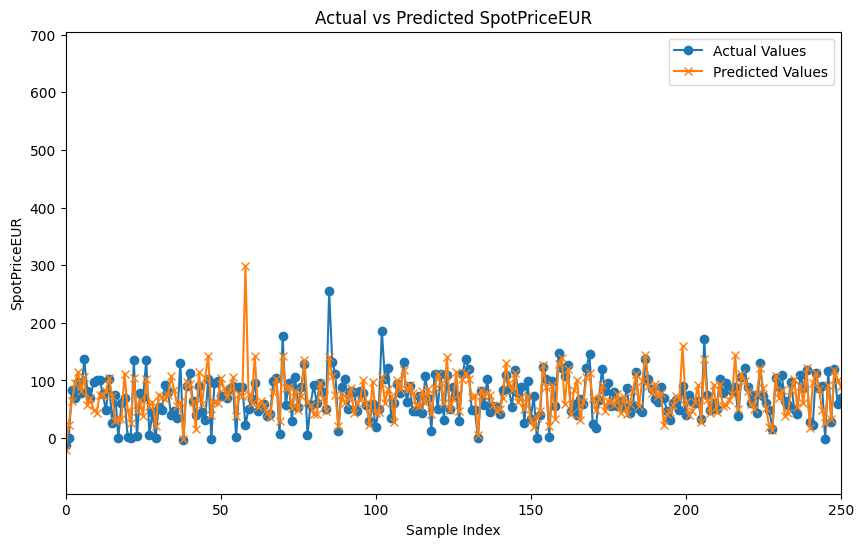

In [17]:
# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('SpotPriceEUR')
plt.title('Actual vs Predicted SpotPriceEUR')
plt.xlim(0,250)
plt.legend()
plt.show()

In [ ]:
# Random Forest has the lowest MSE and highest R^2 score so far 
# (DecisionTreeRegressor was worse than linear model in linear_regression.py)

In [30]:
# Gradient Boost model

# Select the input variables and the target variable
X = merged_data[['wind_speed_10m (km/h)', 'terrestrial_radiation (W/m²)', 'ShareMWh', 'hour_of_day']]
y = merged_data['SpotPriceEUR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gradboost = model.predict(X_test)

# Evaluate the model
mse_gradboost = mean_squared_error(y_test, y_pred_gradboost)
r2_gradboost = r2_score(y_test, y_pred_gradboost)

print(f"Mean Squared Error: {mse_gradboost}")
print(f"R^2 Score: {r2_gradboost}")


Mean Squared Error: 1236.799034206434
R^2 Score: 0.4588201348780747


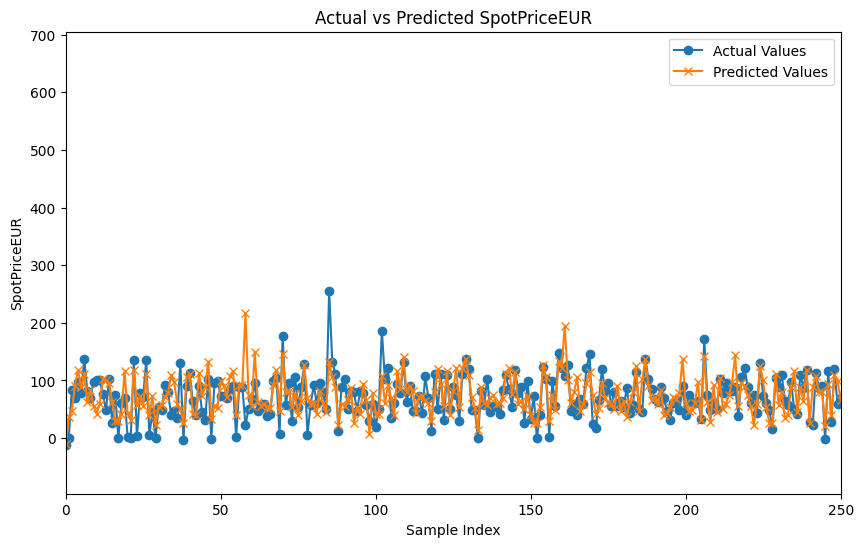

In [21]:
# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('SpotPriceEUR')
plt.title('Actual vs Predicted SpotPriceEUR')
plt.xlim(0,250)
plt.legend()
plt.show()

In [27]:
# HistGradientBoosting model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Histogram-based Gradient Boosting model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_histgradboost = model.predict(X_test)
y_pred = model.predict(X_test)

# Evaluate the model
mse_histgradboost = mean_squared_error(y_test, y_pred_histgradboost)
r2_histgradboost = r2_score(y_test, y_pred_histgradboost)

print(f"Mean Squared Error: {mse_histgradboost}")
print(f"R^2 Score: {r2_histgradboost}")

Mean Squared Error: 1203.0651744595195
R^2 Score: 0.4735808883739656


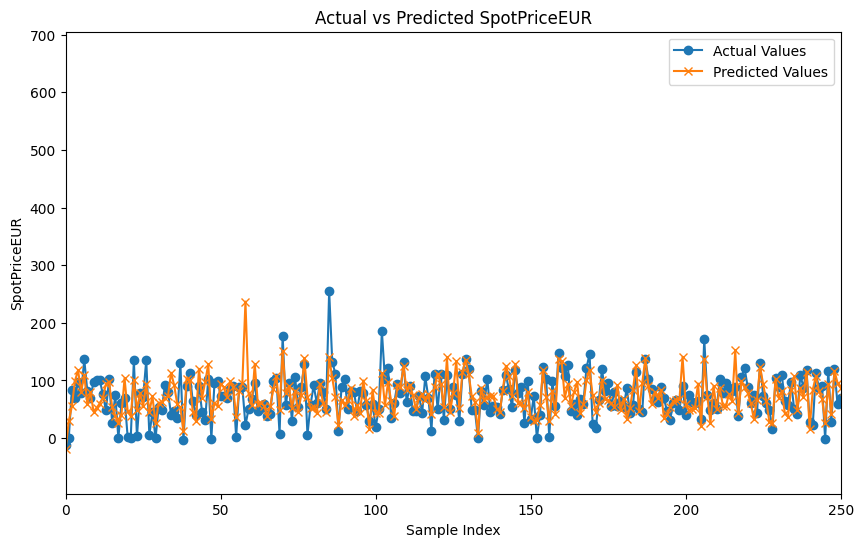

In [28]:
# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred_histgradboost, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('SpotPriceEUR')
plt.title('Actual vs Predicted SpotPriceEUR')
plt.xlim(0, 250)
plt.legend()
plt.show()

Best Parameters: {'learning_rate': 0.1, 'max_bins': 64, 'max_depth': 5, 'max_iter': 200, 'min_samples_leaf': 20}
Optimized Mean Squared Error: 1148.9088601636581
Optimized R^2 Score: 0.49727779147264894


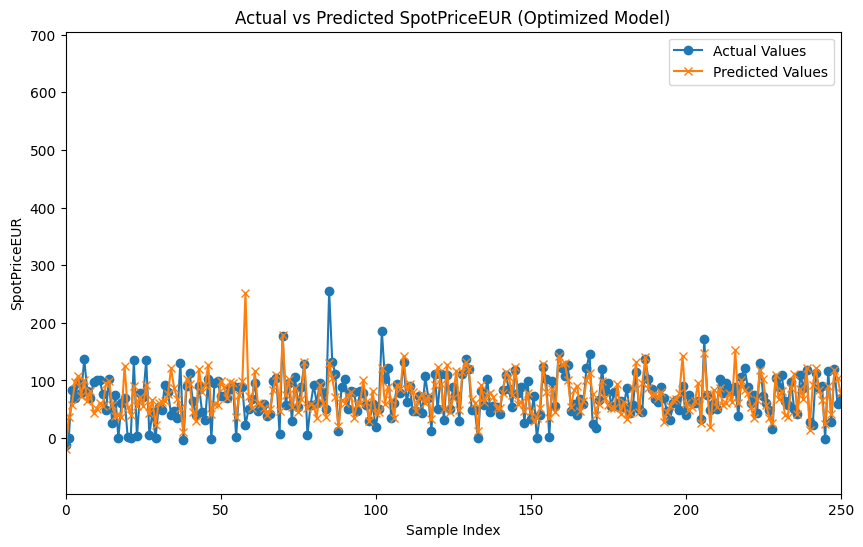

In [34]:
# Define the parameter grid for Grid Search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [20, 50, 100],
    'max_bins': [64,126,255]
}

# Create the Grid Search object
grid_search = GridSearchCV(HistGradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Mean Squared Error: {mse_best}")
print(f"Optimized R^2 Score: {r2_best}")

# Plot the actual vs predicted values for the optimized model
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred_best, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('SpotPriceEUR')
plt.title('Actual vs Predicted SpotPriceEUR (Optimized Model)')
plt.xlim(0, 250)
plt.legend()
plt.show()